# Basic MICE Imputation

This notebook introduces the basic workflow for using the MICE class.

## Overview

In this example, we will:
1. Load and explore a dataset with missing values
2. Visualize the missing data pattern
3. Initialize a MICE object
4. Run imputation with default settings
5. Access and examine the imputed datasets
6. Check convergence with chain statistics


## 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')  # Add parent directory to path

from imputation.MICE import MICE
from plotting.utils import md_pattern_like, plot_missing_data_pattern
from plotting.diagnostics import plot_chain_stats


## 2. Load and Explore the NHANES Dataset

The NHANES (National Health and Nutrition Examination Survey) dataset is a small dataset commonly used in missing data examples.


In [12]:
# Load the dataset
df = pd.read_csv('data/nhanes.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))


Dataset shape: (25, 4)

First few rows:
   age   bmi  hyp    chl
0    1   NaN  NaN    NaN
1    2  22.7  1.0  187.0
2    1   NaN  1.0  187.0
3    3   NaN  NaN    NaN
4    1  20.4  1.0  113.0
5    3   NaN  NaN  184.0
6    1  22.5  1.0  118.0
7    1  30.1  1.0  187.0
8    2  22.0  1.0  238.0
9    2   NaN  NaN    NaN


In [13]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nMissing percentage per column:")
print((df.isnull().sum() / len(df) * 100).round(2))


Missing values per column:
age     0
bmi     9
hyp     8
chl    10
dtype: int64

Missing percentage per column:
age     0.0
bmi    36.0
hyp    32.0
chl    40.0
dtype: float64


## 3. Visualize Missing Data Pattern

Understanding the pattern of missing data helps assess whether MICE is appropriate for your data.


In [14]:
# Generate missing data pattern table
pattern_df = md_pattern_like(df)
print("Missing Data Pattern:")
print(pattern_df)


Missing Data Pattern:
           age  hyp  bmi  chl  #miss_row
#rows                                   
13           1    1    1    1          0
3            1    1    1    0          1
1            1    1    0    1          1
1            1    0    0    1          2
7            1    0    0    0          3
#miss_col    0    8    9   10         27


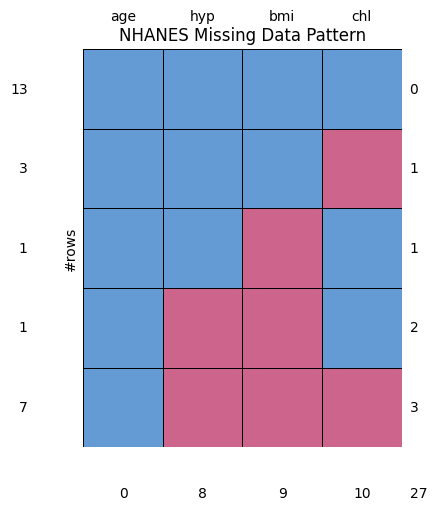

,age,hyp,bmi,chl,#miss_row
#rows,,,,,
13,1,1,1,1,0
3,1,1,1,0,1
1,1,1,0,1,1
1,1,0,0,1,2
7,1,0,0,0,3
#miss_col,0,8,9,10,27


In [15]:
# Visualize the missing data pattern
plot_missing_data_pattern(pattern_df, title="NHANES Missing Data Pattern")


## 4. Initialize MICE and Run Imputation

Now we'll create a MICE object and perform imputation with default settings.


In [6]:
# Initialize MICE with the data
mice = MICE(df)
print("MICE object created successfully!")


MICE object created successfully!


In [16]:
# Perform imputation with default settings
# - n_imputations=5: Create 5 complete datasets
# - maxit=10: Run 10 iterations per imputation
# - method='sample': Use random sampling from observed values (default)
imputed_datasets = mice.impute(n_imputations=5, maxit=10)

print(f"\nImputation complete! Generated {len(imputed_datasets)} datasets.")



Imputation complete! Generated 5 datasets.


## 5. Access and Examine Imputed Datasets

The imputed datasets are stored in the `.imputed_datasets` attribute.


In [17]:
# Access the first imputed dataset
print("First imputed dataset:")
print(mice.imputed_datasets[0].head())

# Verify no missing values
print("\nMissing values in first imputed dataset:")
print(mice.imputed_datasets[0].isnull().sum())


First imputed dataset:
   age   bmi  hyp    chl
0    1  20.4  1.0  204.0
1    2  22.7  1.0  187.0
2    1  20.4  1.0  187.0
3    3  22.0  1.0  204.0
4    1  20.4  1.0  113.0

Missing values in first imputed dataset:
age    0
bmi    0
hyp    0
chl    0
dtype: int64


In [18]:
# Compare original and imputed data for a specific observation
row_idx = 0  # First row (has missing values)

print(f"Original data (row {row_idx}):")
print(df.iloc[row_idx])

print(f"\nImputed values across all {len(mice.imputed_datasets)} datasets:")
for i, dataset in enumerate(mice.imputed_datasets):
    print(f"Imputation {i+1}: {dataset.iloc[row_idx].to_dict()}")


Original data (row 0):
age    1.0
bmi    NaN
hyp    NaN
chl    NaN
Name: 0, dtype: float64

Imputed values across all 5 datasets:
Imputation 1: {'age': 1.0, 'bmi': 20.4, 'hyp': 1.0, 'chl': 204.0}
Imputation 2: {'age': 1.0, 'bmi': 27.4, 'hyp': 1.0, 'chl': 187.0}
Imputation 3: {'age': 1.0, 'bmi': 35.3, 'hyp': 1.0, 'chl': 186.0}
Imputation 4: {'age': 1.0, 'bmi': 30.1, 'hyp': 2.0, 'chl': 218.0}
Imputation 5: {'age': 1.0, 'bmi': 25.5, 'hyp': 1.0, 'chl': 187.0}


## 6. Export Imputed Datasets

You can save the imputed datasets for further analysis.


In [10]:
# Example: Save all imputed datasets to CSV files
# Uncomment to save:
# for i, dataset in enumerate(mice.imputed_datasets):
#     dataset.to_csv(f'imputed_nhanes_{i+1}.csv', index=False)
#     print(f"Saved imputation {i+1}")

print("(Uncomment the code above to save datasets)")


(Uncomment the code above to save datasets)


## 7. Check Convergence with Chain Statistics

It's possible to check how convergence plots look like.


Plotting chain statistics for: ['bmi', 'hyp', 'chl']


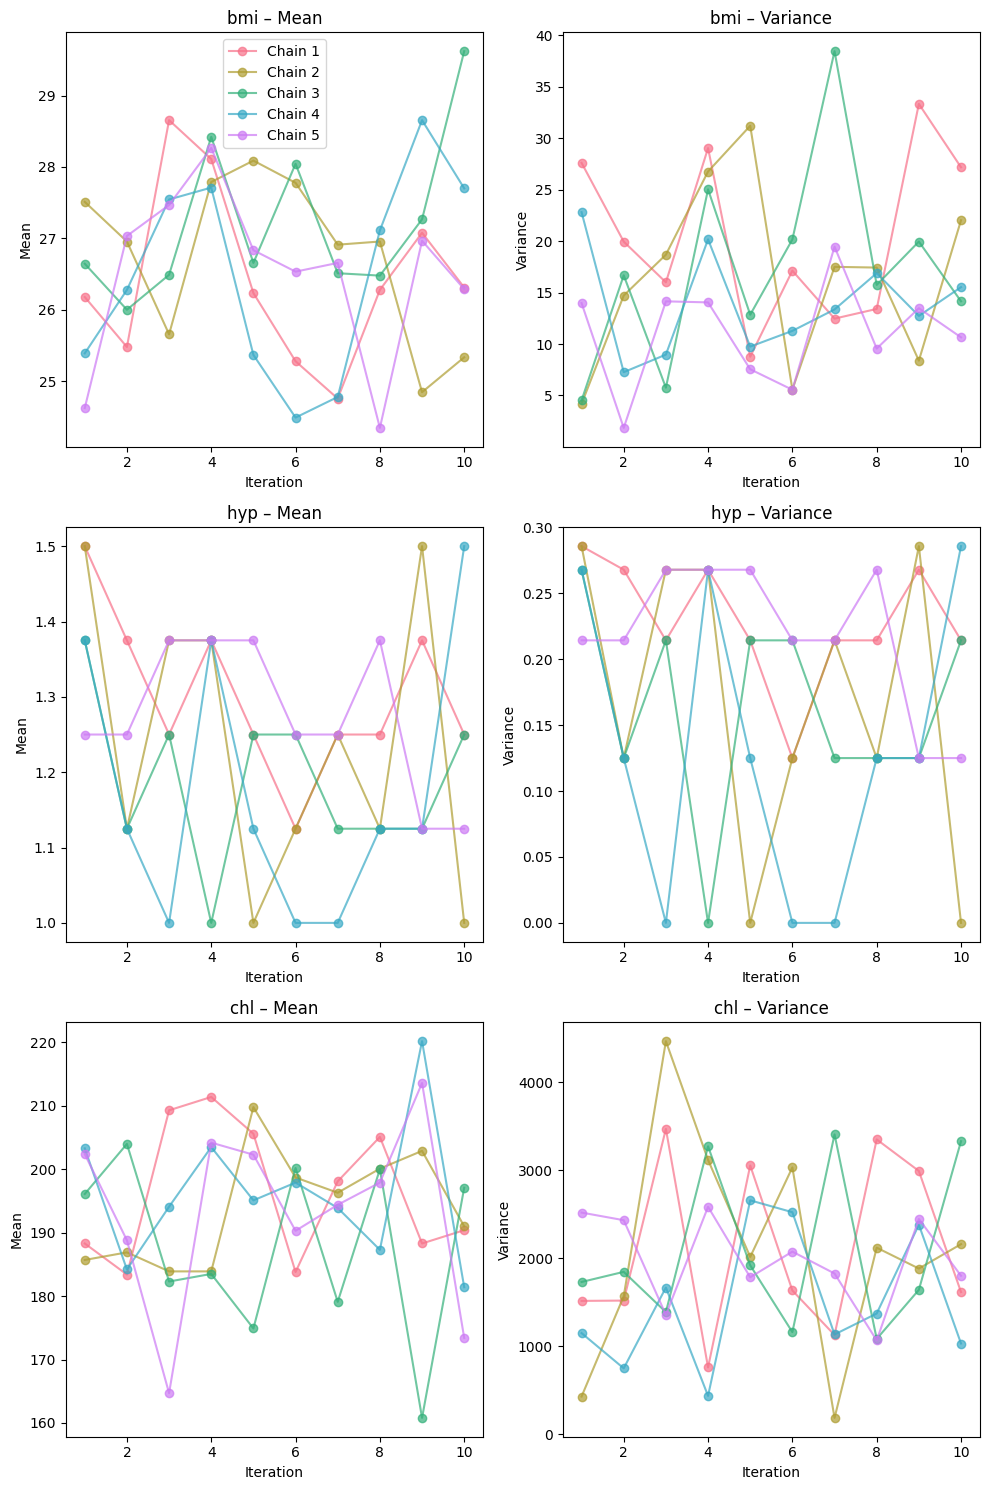

In [19]:
# Plot chain statistics for numeric columns with missing values
cols_with_missing = [col for col in df.columns if df[col].isna().any()]
numeric_cols = df[cols_with_missing].select_dtypes(include=[np.number]).columns.tolist()

print(f"Plotting chain statistics for: {numeric_cols}")
plot_chain_stats(mice.chain_mean, mice.chain_var, columns=numeric_cols)


## Summary

In this notebook, we learned:
- How to load and explore data with missing values
- How to visualize missing data patterns
- How to initialize a MICE object and run basic imputation
- How to access and examine imputed datasets
- How to check convergence using chain statistics

**Next steps**: 
- See `02_imputation_methods.ipynb` to learn about different imputation methods
- See `04_analysis_workflow.ipynb` to learn how to fit models and pool results
- See `05_diagnostic_plots.ipynb` for comprehensive plotting options
